In [141]:
from itertools import groupby

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

from plotly.graph_objs.bar.marker.colorbar import Title

warnings.filterwarnings('ignore')

df = pd.read_csv('ipl.csv')
df

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [143]:
df.shape
print(f"Number of rows:", df.shape[0], "Number of columns:", df.shape[1])

Number of rows: 74 Number of columns: 20


In [144]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

<Axes: ylabel='match_winner'>

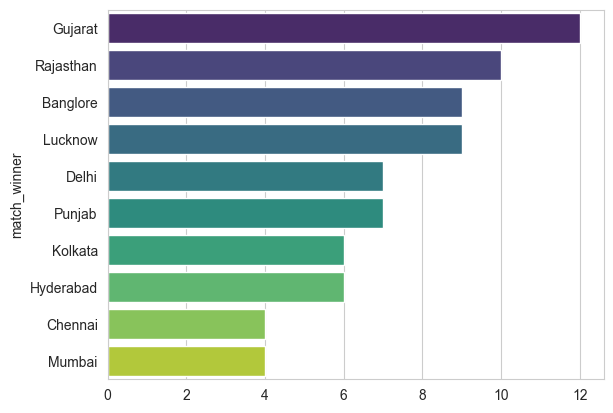

In [145]:
match_winner = df['match_winner'].value_counts()

sns.barplot(y=match_winner.index, x=match_winner.values,
            palette='viridis')

<Axes: xlabel='toss_decision', ylabel='count'>

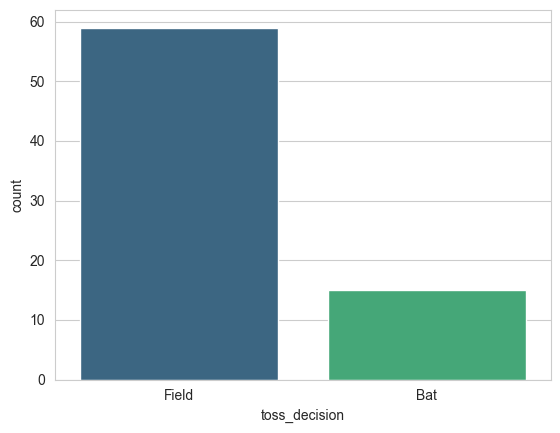

In [146]:
sns.countplot(x=df['toss_decision'], palette='viridis')

In [147]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count * 100)/df.shape[0]
percentage.round(2)

np.float64(48.65)

<Axes: xlabel='won_by', ylabel='count'>

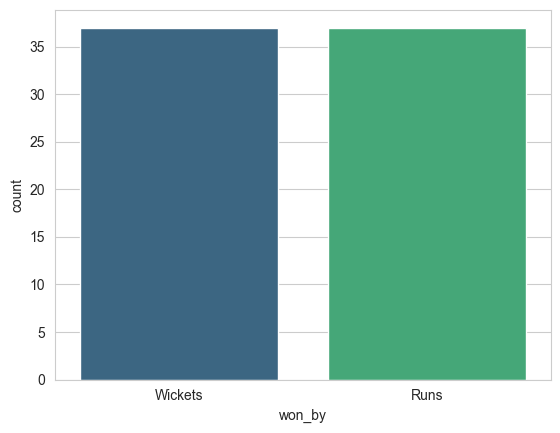

In [148]:
sns.countplot(x=df['won_by'], palette='viridis')

<Axes: ylabel='player_of_the_match'>

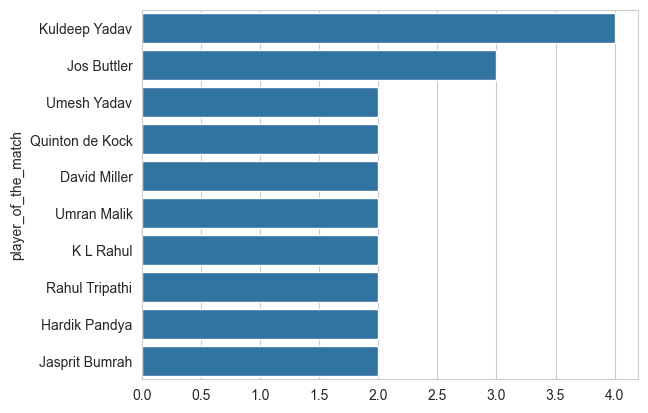

In [149]:
player_of_match = df['player_of_the_match'].value_counts().head(10)
sns.barplot(y=player_of_match.index, x=player_of_match.values,)

<Axes: xlabel='top_scorer', ylabel='highscore'>

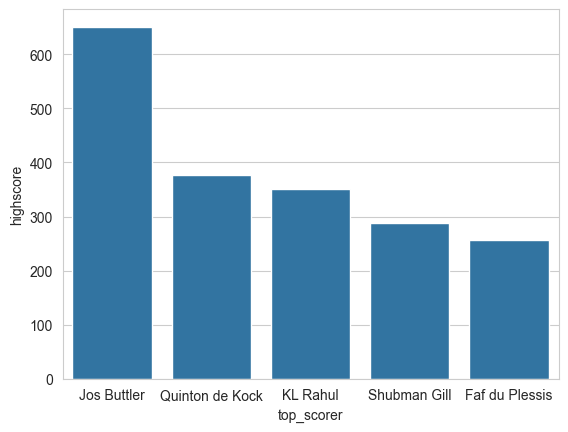

In [150]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(5)
sns.barplot(high)

<Axes: ylabel='best_bowling'>

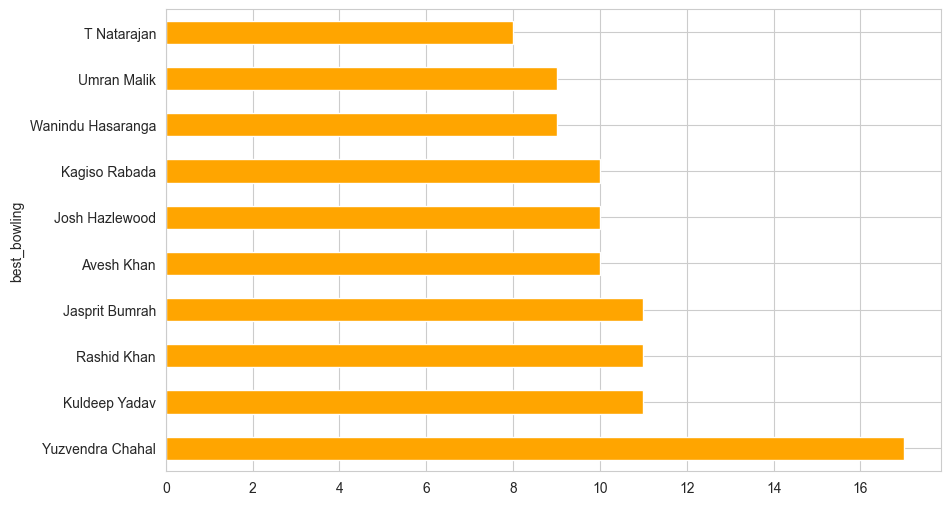

In [157]:
df['highest_wicket'] = df['best_bowling_figure'].apply(lambda x: int(x.split('--')[0].split('/')[0]))
df['highest_wicket'].astype(int)
top_bowler = df.groupby('best_bowling')['highest_wicket'].sum().sort_values(ascending=False).head(10)
top_bowler.plot(kind='barh', color='orange', figsize=(10, 6))

<Axes: ylabel='venue'>

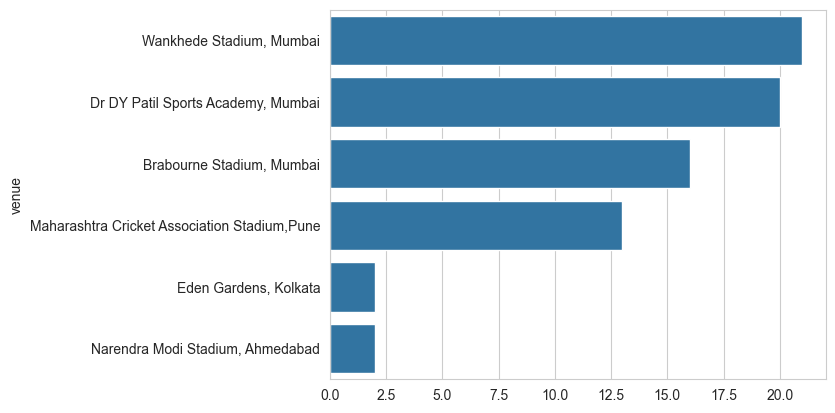

In [152]:
venue = df['venue'].value_counts().head(10)
sns.barplot(y=venue.index, x=venue.values,)

In [153]:
df[df['won_by'] == 'Runs'].sort_values(by=['margin'], ascending=False).head(1)[['match_winner', 'margin']]



,match_winner,margin
54,Chennai,91


In [154]:
df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


In [166]:
df[df['highest_wicket'] == df['highest_wicket'].max()][['best_bowling', 'highest_wicket']]

,best_bowling,highest_wicket
29,Yuzvendra Chahal,5
39,Umran Malik,5
53,Wanindu Hasaranga,5
55,Jasprit Bumrah,5
